<h1>Arabidopsis Thaliana Comparison to PCR data</h1>

<h2>RI events </h2>

We we are searching for selected events:
- RI (HSF3;RI:Chr5:5531310:5532499-5532581:5532889:+) ; there are two similar Events 
- RI (PAT1;RI:Chr5:19524309:19524388-19524503:19524674:-)
- RI (LHY;RI:Chr1:37373:37398-37569:37780:-); other RI does not "overlap" with this one
- RI (TRFL6;RI:Chr1:27351194:27351246-27351408:27352308:+); total of 3 conflicting Events

In [64]:
# imports and deffinitions

%matplotlib inline
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (13.0, 10.0)


def extract_event(event_id, event_file):
    """
    Returns PSI for selected event
    """
    with open(event_file) as handle:
        next(handle)
        for line in handle:
            line = line.split()
            if line[0] == event_id:
                return [ float(x) for x in line[1:]]

def onebase(ev_dict):
    """
    Devides all Dict values by 100
    """
    for eid in ev_dict:
        ev_dict[eid] = [x / 100. for x in ev_dict[eid]]
    return ev_dict

<h3>RI current suppa inplementation</h3>

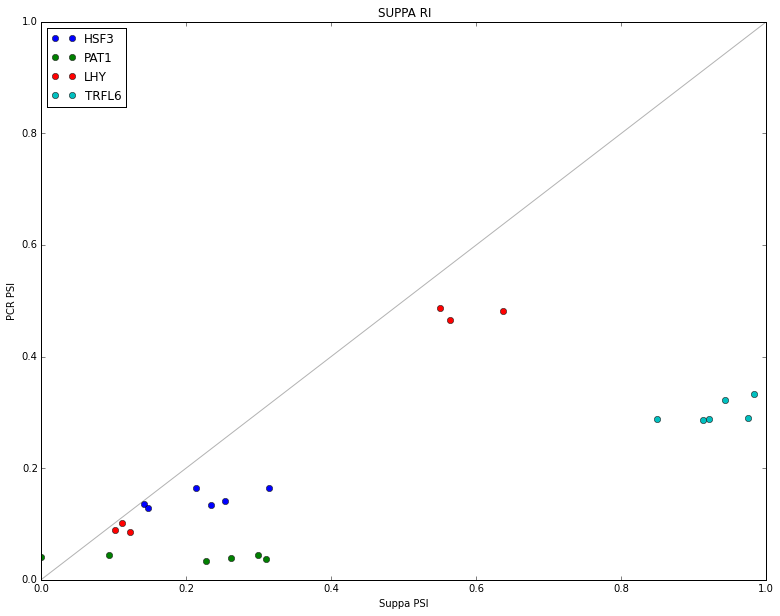

In [65]:
g_keys = ['HSF3;RI:Chr5:5531310:5532499-5532581:5532889:+',
         'PAT1;RI:Chr5:19524309:19524388-19524503:19524674:-',
         'LHY;RI:Chr1:37373:37398-37569:37780:-',
         'TRFL6;RI:Chr1:27351194:27351246-27351408:27352308:+']


pcr_vals = {
    'HSF3;RI:Chr5:5531310:5532499-5532581:5532889:+': [13.4168583, 13.56425557, 12.8220997, 14.14980801, 16.51817716, 16.5250309],
    'PAT1;RI:Chr5:19524309:19524388-19524503:19524674:-': [4.454851791, 3.346584984, 3.751838162, 3.912483912, 4.478702904, 4.031789106],
    'LHY;RI:Chr1:37373:37398-37569:37780:-': [10.09722585, 8.882278866, 8.585137255, 48.66148401, 46.63044852, 48.20023962],
    'TRFL6;RI:Chr1:27351194:27351246-27351408:27352308:+': [28.88508593, 32.25164635, 33.36971648, 29.07995619, 28.67432531, 28.8516268]
}

pcr_vals = onebase(pcr_vals)

my_figure = pyplot.figure()

axes = my_figure.add_subplot(111)
axes.plot([0, 1], [0, 1], 'black', alpha=0.3)
for event_id in g_keys:
    axes.plot(extract_event(event_id, '../../AT_psi/AT_RI.psi'), pcr_vals[event_id], 'o', label=event_id.split(';')[0])
axes.set_xlabel('Suppa PSI')
axes.set_ylabel('PCR PSI')
axes.legend(loc='best')
axes.set_title('SUPPA RI')
pyplot.show()


Multiple events in TRFL6 case. Visualization:
<img src="files/TRFL6_ri.jpg">

This can be resolved with RI_pcr2

<h3>RI pcr implementation </h3>

<img src="files/RI_implementations1.jpg">

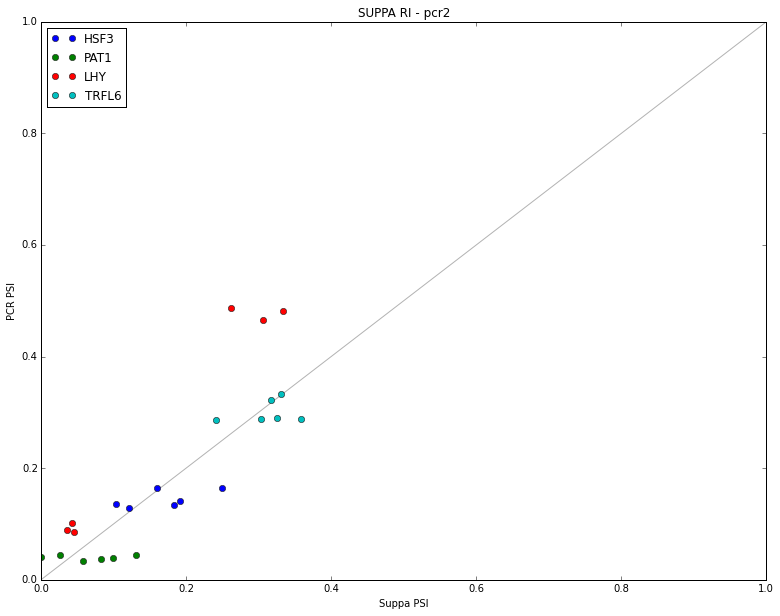

Margin was set to 23bp.


In [9]:
g_keys = ['HSF3;RIpcr2:Chr5:5532499-5532581:+', 'PAT1;RIpcr2:Chr5:19524388-19524503:-', 'LHY;RIpcr2:Chr1:37398-37569:-',
        'TRFL6;RIpcr2:Chr1:27351246-27351408:+']

pcr_vals = {
    'HSF3;RIpcr2:Chr5:5532499-5532581:+': [13.4168583, 13.56425557, 12.8220997, 14.14980801, 16.51817716, 16.5250309],
    'PAT1;RIpcr2:Chr5:19524388-19524503:-': [4.454851791, 3.346584984, 3.751838162, 3.912483912, 4.478702904, 4.031789106],
    'LHY;RIpcr2:Chr1:37398-37569:-': [10.09722585, 8.882278866, 8.585137255, 48.66148401, 46.63044852, 48.20023962],
    'TRFL6;RIpcr2:Chr1:27351246-27351408:+': [28.88508593, 32.25164635, 33.36971648, 29.07995619, 28.67432531, 28.8516268]
}

pcr_vals = onebase(pcr_vals)
my_figure = pyplot.figure()

axes = my_figure.add_subplot(111)
axes.plot([0, 1], [0, 1], 'black', alpha=0.3)
for event_id in g_keys:
    axes.plot(extract_event(event_id, '../../AT_psi/AT_RIpcr2.psi'), pcr_vals[event_id], 'o', label=event_id.split(';')[0])
axes.set_xlabel('Suppa PSI')
axes.set_ylabel('PCR PSI')
axes.legend(loc='best')
axes.set_title('SUPPA RI - pcr2')
pyplot.show()
print('Margin was set to 23bp.')

<h3>A3 and A5 Splicing Events</h3>

We we are searching for selected events:
- A3 (HSF3;A3:Chr5:5532499-5532581:5532499-5532589:+); single A3 event with RI event "combined".
- A3 (PAT1;A3:Chr5:19524083-19524309:19524072-19524309:-); 2 events total (because of followed SE event)
- A3 (TRFL6;A3:Chr1:27352686-27352818:27352686-27352861:+); NOTE: There are 2 events. In slides they do not say in which one they are interested. I asume it is this one.
- A5 (TRFL6;A5:Chr1:27351264-27351418:27351246-27351418:+)



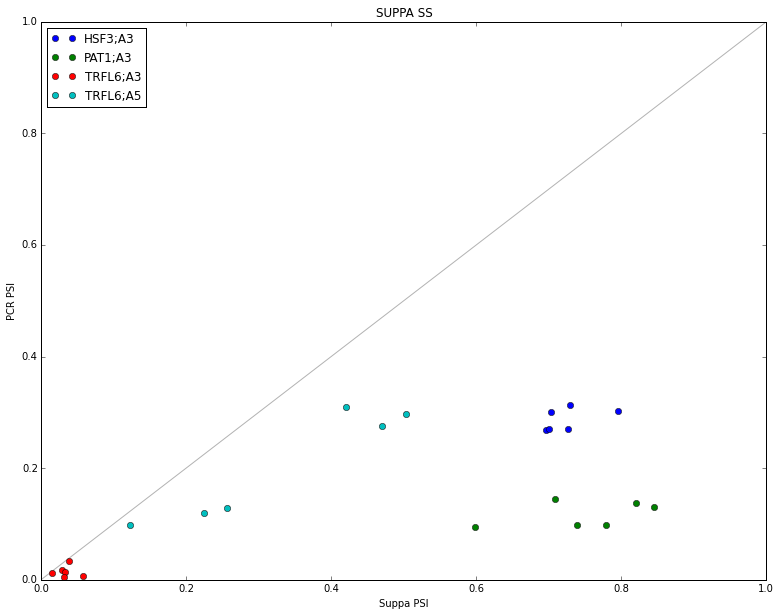

In [66]:
g_keys = ['HSF3;A3:Chr5:5532499-5532581:5532499-5532589:+', 'PAT1;A3:Chr5:19524083-19524309:19524072-19524309:-', 'TRFL6;A3:Chr1:27352686-27352818:27352686-27352861:+',
          'TRFL6;A5:Chr1:27351264-27351418:27351246-27351418:+']
pcr_vals = {
    'HSF3;A3:Chr5:5532499-5532581:5532499-5532589:+': [31.4090873, 30.10478824, 30.2014178, 26.76371139, 27.00460829, 26.95457355], 
    'PAT1;A3:Chr5:19524083-19524309:19524072-19524309:-': [14.51253641, 13.68287278, 13.0757919, 9.888459888, 9.734866104, 9.464043419],  
    'TRFL6;A3:Chr1:27352686-27352818:27352686-27352861:+': [1.740460239, 1.4571949, 0.594864518, 3.443318729, 0.455871627, 1.184524267], 
    'TRFL6;A5:Chr1:27351264-27351418:27351246-27351418:+': [9.772793475, 12.02466022, 12.92056649, 27.47809419, 30.99927061, 29.766941]
}

pcr_vals = onebase(pcr_vals)
my_figure = pyplot.figure()

axes = my_figure.add_subplot(111)
axes.plot([0, 1], [0, 1], 'black', alpha=0.3)
for event_id in g_keys:
    axes.plot(extract_event(event_id, '../../AT_psi/AT_A3.psi'), pcr_vals[event_id], 'o', label=event_id.split(':')[0])
axes.set_xlabel('Suppa PSI')
axes.set_ylabel('PCR PSI')
axes.legend(loc='best')
axes.set_title('SUPPA SS')
pyplot.show()


<h3>SS pcr implementation </h3>

There the SUPPA PCR is tested

<img src="files/SS_implementation.jpg">

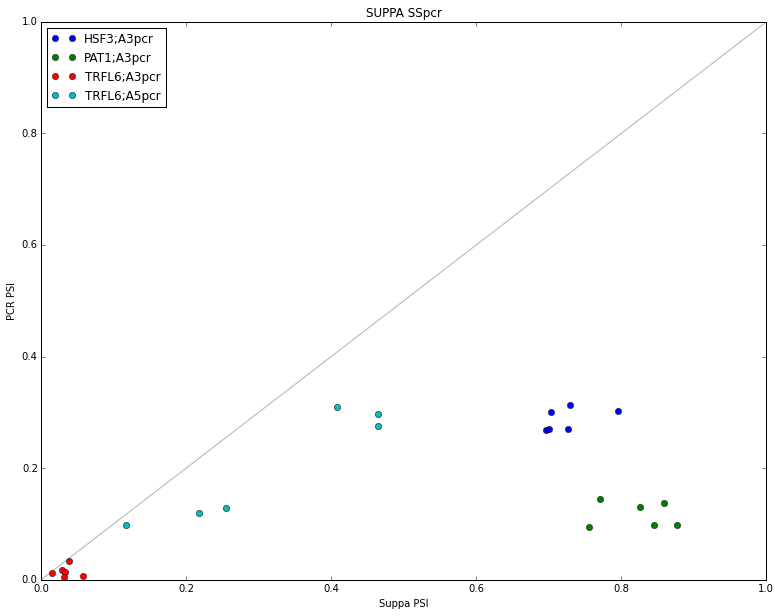

In [75]:
g_keys = ['HSF3;A3pcr:Chr5:5532581:5532589:+', 'PAT1;A3pcr:Chr5:19524072:19524083:-', 'TRFL6;A3pcr:Chr1:27352818:27352861:+',
          'TRFL6;A5pcr:Chr1:27351246:27351264:+']
pcr_vals = {
    'HSF3;A3pcr:Chr5:5532581:5532589:+': [31.4090873, 30.10478824, 30.2014178, 26.76371139, 27.00460829, 26.95457355], 
    'PAT1;A3pcr:Chr5:19524072:19524083:-': [14.51253641, 13.68287278, 13.0757919, 9.888459888, 9.734866104, 9.464043419],  
    'TRFL6;A3pcr:Chr1:27352818:27352861:+': [1.740460239, 1.4571949, 0.594864518, 3.443318729, 0.455871627, 1.184524267], 
    'TRFL6;A5pcr:Chr1:27351246:27351264:+': [9.772793475, 12.02466022, 12.92056649, 27.47809419, 30.99927061, 29.766941]
}


pcr_vals = onebase(pcr_vals)
my_figure = pyplot.figure()

axes = my_figure.add_subplot(111)
axes.plot([0, 1], [0, 1], 'black', alpha=0.3)
for event_id in g_keys:
    axes.plot(extract_event(event_id, '../../AT_psi/AT_A3pcr.psi'), pcr_vals[event_id], 'o', label=event_id.split(':')[0])
axes.set_xlabel('Suppa PSI')
axes.set_ylabel('PCR PSI')
axes.legend(loc='best')
axes.set_title('SUPPA SSpcr')
pyplot.show()


PAT1 events are now joined (as sugested on slide 12), but results are not better.

<h3>SS with all transcripts in denominator </h3>

As sugested on slide 25

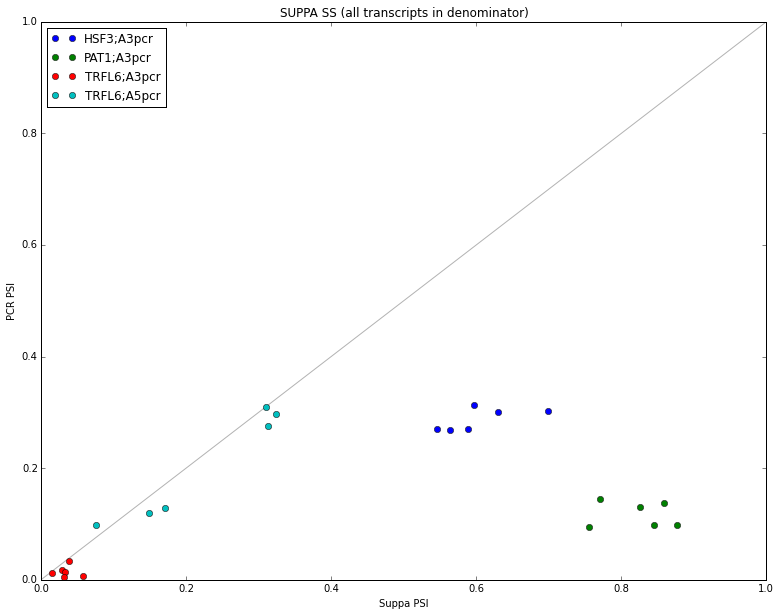

In [78]:
my_figure = pyplot.figure()

axes = my_figure.add_subplot(111)
axes.plot([0, 1], [0, 1], 'black', alpha=0.3)
for event_id in g_keys:
    axes.plot(extract_event(event_id, '../../AT_psi/SS_vs_ALL_selected.psi'), pcr_vals[event_id], 'o', label=event_id.split(':')[0])
axes.set_xlabel('Suppa PSI')
axes.set_ylabel('PCR PSI')
axes.legend(loc='best')
axes.set_title('SUPPA SS (all transcripts in denominator)')
pyplot.show()
